In [2]:
import numpy as np
from astropy import units as u
import astropy.coordinates as coord
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
import mysql.connector
from matplotlib import colors
from matplotlib.ticker import FuncFormatter

In [3]:
def QueryDB(query, port='3306', query_data=None):
    
    results = []
    
    cnx = mysql.connector.connect(user='prospecktor', password='4Pr0spi3!', host='127.0.0.1', port=port, database='Prospecktor')
    cursor = cnx.cursor()
    
    if query_data is not None:
        cursor.execute(query, query_data)
    else:
        cursor.execute(query)
    
    results = [result for result in cursor]
    
    cursor.close()
    cnx.close()
    
    return results

In [4]:
#This cell should retrieve Galaxy Name, distance where d <20 Mpc

query = ("SELECT Name_GWGC,dist from Galaxy WHERE Name_GWGC is NOT NULL and dist IS NOT NULL and dist < 20.0")
results = QueryDB(query,port="53306")

glade_galaxy_name = []
glade_dist_less40 = []

for row in results:
    
    glade_galaxy_name.append(row[0])
    glade_dist_less40.append(row[1])
    
print results

[(u'NGC0253', 3.92595099046), (u'NGC5128', 3.76743399832), (u'NGC5236', 4.46732076201), (u'NGC4736', 4.24571533533), (u'NGC0055', 2.18817755456), (u'NGC0300', 1.87855744795), (u'NGC5102', 3.58100833048), (u'NGC7793', 3.94486557231), (u'NGC4548', 17.7009790417), (u'NGC6503', 4.28535074094), (u'NGC4442', 15.2759187606), (u'NGC4469', 17.7833603419), (u'NGC0247', 3.75032192604), (u'NGC4586', 14.2558664233), (u'NGC4440', 18.6525891462), (u'NGC4342', 16.2720013287), (u'NGC4387', 17.9472250389), (u'NGC4424', 5.75407289101), (u'NGC4207', 19.9533266021), (u'NGC4206', 18.5348648942), (u'NGC4144', 6.66814751405), (u'NGC3109', 1.3296094075), (u'NGC4630', 16.4438410251), (u'NGC4595', 16.0692553053), (u'IC3653', 15.4875732036), (u'NGC4455', 10.519846788), (u'NGC0784', 4.96645007396), (u'UGC07321', 5.75407289101), (u'IC3381', 16.6718749094), (u'NGC4328', 8.08313872063), (u'PGC042497', 11.1113043618), (u'PGC045084', 6.91790412822), (u'ESO572-034', 10.8187199218), (u'NGC4948A', 11.5348852455), (u'IC125

Should we make a new table in mysql to store above galaxies so we only have to iterate over THOSE the next time we cut down?

Then below cell would say from "new table" instead of from Galaxy, and should take less time bc less info, and is already filtered.

In [ ]:
#This cell should retrieve angle dependent on Thatcher telescope pointing limitations

query = ("SELECT Name_GWGC,dist from Galaxy WHERE Name_GWGC is NOT NULL and dist IS NOT NULL and dist < 20.0")
results = QueryDB(query,port="53306")

glade_galaxy_name = []
glade_dist_less40 = []

for row in results:
    
    glade_galaxy_name.append(row[0])
    glade_dist_less40.append(row[1])
    
print results

In [22]:
query = ("SELECT Dist,B from GWGC WHERE Dist IS NOT NULL and B IS NOT NULL")
results = QueryDB(query,port="53306")

gwgc_dist = []
gwgc_B = []
for row in results:
    gwgc_dist.append(row[0])
    gwgc_B.append(row[1])

In [6]:
# This query takes a long time, because the table has 3 million rows to check...
query = ("SELECT dist from Galaxy WHERE dist IS NOT NULL")
results = QueryDB(query,port="53306")

glade_dist = []
for row in results:
    glade_dist.append(row[0])

In [7]:
query = ("SELECT dist,B from Galaxy WHERE dist IS NOT NULL and dist < 300.0 and B IS NOT NULL")
results = QueryDB(query,port="53306")

glade_dist_less300 = []
glade_B_less300 = []
for row in results:
    glade_dist_less300.append(row[0])
    glade_B_less300.append(row[1])

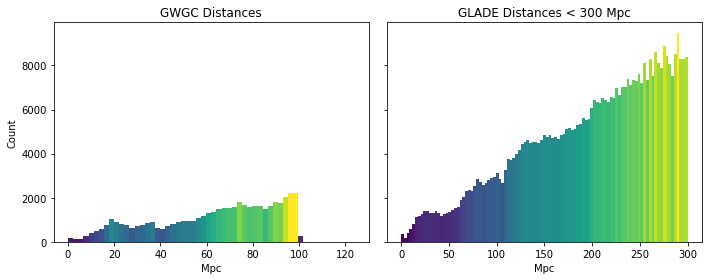

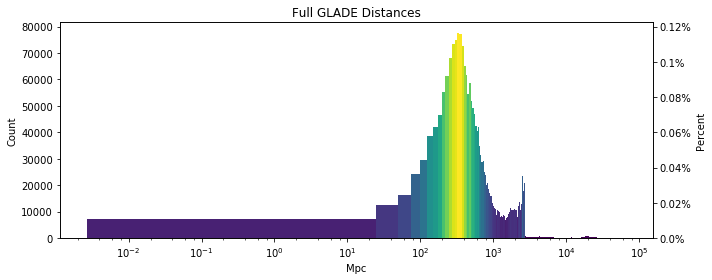

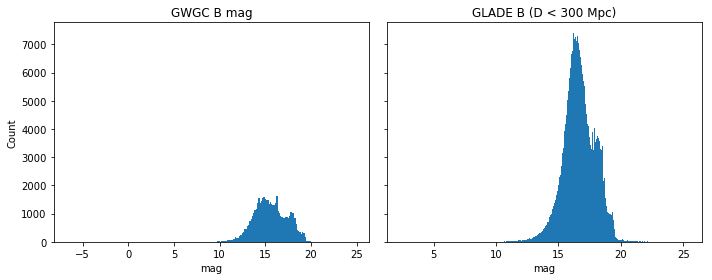

In [8]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)
    return s + '%'

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
N1, bins1, patches1 = axs[0].hist(gwgc_dist, bins='auto')
fracs1 = N1.astype(float) / N1.max()
norm1 = colors.Normalize(fracs1.min(), fracs1.max())
for thisfrac, thispatch in zip(fracs1, patches1):
    color = plt.cm.viridis(norm1(thisfrac))
    thispatch.set_facecolor(color)
axs[0].set_title("GWGC Distances")
axs[0].set_xlabel("Mpc")
axs[0].set_ylabel("Count")

N2, bins2, patches2 = axs[1].hist(glade_dist_less300, bins='auto')
fracs2 = N2.astype(float) / N2.max()
norm2 = colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2):
    color = plt.cm.viridis(norm2(thisfrac))
    thispatch.set_facecolor(color)
axs[1].set_title("GLADE Distances < 300 Mpc")
axs[1].set_xlabel("Mpc")

plt.tight_layout()
plt.show()

# 

fig, ax1 = plt.subplots(figsize=(10, 4)) #, sharex=True 1, 1, 
N3, bins3, patches3 = ax1.hist(glade_dist, bins='auto')
ax1.set_ylabel("Count")
ax1.set_xscale("log")
ax1.set_xlabel("Mpc")
ax1.set_title("Full GLADE Distances")

ax2 = ax1.twinx()
N4, bins4, patches4 = ax2.hist(glade_dist, bins=bins3, normed=True)

# We'll color code by height, but you could use any scalar
fracs4 = N4.astype(float) / N4.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm4 = colors.Normalize(fracs4.min(), fracs4.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs4, patches4):
    color = plt.cm.viridis(norm4(thisfrac))
    thispatch.set_facecolor(color)

formatter = FuncFormatter(to_percent)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Percent")
ax2.set_xscale("log")

plt.tight_layout()
plt.show()

#

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True) #  , tight_layout=True

# We can set the number of bins with the `bins` kwarg
axs[0].hist(gwgc_B, bins='auto')

axs[0].set_title("GWGC B mag")
axs[0].set_xlabel("mag")
axs[0].set_ylabel("Count")

axs[1].hist(glade_B_less300, bins='auto')
axs[1].set_title("GLADE B (D < 300 Mpc)")
axs[1].set_xlabel("mag")

plt.tight_layout()
plt.show()

the filters we need are: FnumberLP, and wide ones (W)

We are looking for more hst better

filter by distance, 50 mparsecs

pull back all rows where d<20 still takes a while

query GWDC first, bc these are closer and mostly complete

Figure out code first and then apply to Glade

dust filters to get rid of ones in plane of galaxy.




distance
irsa  ---  Vband, get dust for all. n=100 at a time

thatcher, find geo coordinates at 90 subtract 90 from dec to get hemisphere they can seee. We can look up pointing units on telescope

<0.5 dust in V band

THEN look for hst imaging and stuff that 

ned query, of the galaxies <40 Mpc to flag ones head on to us 90 or 0

build a table for thatcher

newest version of astroquery....

part of ez access github 